# 00_Showcase RbsB: a FEATHER walkthrough

## import

In [ ]:
import sys

from pigeon_feather.data import *
from pigeon_feather.plot import *
from pigeon_feather.hxio import *
from pigeon_feather.spectra import *


import argparse
import numpy as np
import pandas as pd
import shutil

## Load the data

In [2]:
tables = [
    "./data/10-25_rbsb_pool_results-CLEANED-100.csv",
    "./data/10-18-RbsB_peptide_pool_results-CLEAN-100.csv",
]

ranges = [
    "./data/rangeslist-10-25-select-cleaned.csv",
    "./data/rangeslist-10-18-select-cleaned.csv",
]


raw_spectra_paths = [
    "./data/SpecExport_rbsb_1025/",
    "./data/SpecExport_rbsb_1018/",
]

protein_sequence = "MNMKKLATLVSAVALSATVSANAMAKDTIALVVSTLNNPFFVSLKDGAQKEADKLGYNLVVLDSQNNPAKELANVQDLTVRGTKILLINPTDSDAVGNAVKMANQANIPVITLDRQATKGEVVSHIASDNVLGGKIAGDYIAKKAGEGAKVIELQGIAGTSAARERGEGFQQAVAAHKFNVLASQPADFDRIKGLNVMQNLLTAHPDVQAVFAQNDEMALGALRALQTAGKSDVMVVGFDGTPDGEKAVNDGKLAATIAQLPDQIGAKGVETADKVLKGEKVQAKYPVDLKLVVKQ"


# load the data
hdxms_data_list = []
for i in range(2):
    # for i in range(1):

    print(tables[i])
    cleaned = read_hdx_tables([tables[i]], [ranges[i]], exclude=False)
    hdxms_data = load_dataframe_to_hdxmsdata(
        cleaned, n_fastamides=2, protein_sequence=protein_sequence, saturation=0.9
    )
    load_raw_ms_to_hdxms_data(
        hdxms_data,
        raw_spectra_paths[i],
    )
    hdxms_data_list.append(hdxms_data)


./data/10-25_rbsb_pool_results-CLEANED-100.csv
rangeslist included !
44-62 LKDGAQKEADKLGYNLVVL removed
44-62 LKDGAQKEADKLGYNLVVL removed
Done loading raw MS data.
192-209 IKGLNVMQNLLTAHPDVQ removed
235-247 MVVGFDGTPDGEK removed
286-291 YPVDLK removed
45-58 KDGAQKEADKLGYN removed
63-72 DSQNNPAKEL removed
287-292 PVDLKL removed
213-223 AQNDEMALGAL removed
219-229 ALGALRALQTA removed
251-260 DGKLAATIAQ removed
63-72 DSQNNPAKEL removed
193-205 KGLNVMQNLLTAH removed
168-182 EGFQQAVAAHKFNVL removed
174-182 VAAHKFNVL removed
213-223 AQNDEMALGAL removed
221-231 GALRALQTAGK removed
286-291 YPVDLK removed
./data/10-18-RbsB_peptide_pool_results-CLEAN-100.csv
rangeslist included !
Done loading raw MS data.
200-209 NLLTAHPDVQ removed
167-178 GEGFQQAVAAHK removed
63-74 DSQNNPAKELAN removed
75-86 VQDLTVRGTKIL removed
167-178 GEGFQQAVAAHK removed
237-247 VGFDGTPDGEK removed


backexchange for peps that does not have full-D data

In [3]:
tools.backexchange_for_peps_no_data(hdxms_data_list)

Number of peptides with no data: 31
Average backexchange for peptides with no data: 0.806401935122383
Number of peptides with no data: 9
Average backexchange for peptides with no data: 0.7825275491859072


## Peptide subtraction

In [4]:
# [state.add_all_subtract() for data in hdxms_data_list for state in data.states]

In [5]:
[state.num_subtracted_added for data in hdxms_data_list for state in data.states]

[0, 0, 0, 0]

In [6]:
[state.num_peptides for data in hdxms_data_list for state in data.states]

[214, 216, 127, 125]

In [7]:
# for tp in all_tps:
#     try:
#         tp.isotope_envelope
#     except:
#         print(tp.peptide.identifier, tp.deut_time, tp.charge_state)  

## plot uptake plots

In [15]:
# option 1

all_peps = [peptide for hdxms_data in hdxms_data_list for state in hdxms_data.states for peptide in state.peptides]
all_idfs = set([peptide.identifier for peptide in all_peps])

output_path = 'output'

if not os.path.exists(output_path):
    os.makedirs(output_path)
else:
    shutil.rmtree(output_path)
    os.makedirs(output_path)
    
    
for idf in all_idfs:
    uptake = UptakePlot(hdxms_data_list, idf)
    fig = uptake.uptakeplot
    fig.savefig(f"{output_path}/{idf}.png")

In [9]:
# option 2, using the collection object

uptakes = UptakePlotsCollection(if_plot_fit=True)
uptakes.add_plot_all(hdxms_data_list)
# # save all the plots
# uptakes.save_plots('/tmp/test')

In [8]:
# Compare different protein states

## Compare different protein states

In [9]:
# make compare object
# two types of comparison are available,
# 1. peptide compare 
# 2. psudo residue compare (avgerage over all peptides covering a residue)

state1 = 'APO'
state2 = 'RIB'

state1_list = [i.get_state(state1) for i in hdxms_data_list]
state2_list = [i.get_state(state2) for i in hdxms_data_list]

pep_compres = HDXStatePeptideCompares(state1_list, state2_list)
pep_compres.add_all_compare()



In [10]:
# check the results
for i in pep_compres.peptide_compares[:10]:
    print('-----------------')
    print(i.compare_info)
    print(i.common_timepoints)
    print(i.deut_diff)
    
    

-----------------
APO-RIB: 14-23 ALSATVSANA
[    0.    30.   120.   480.   960.  1920.  3840.  7680. 15360.    inf]
[ 0.   -1.27  5.47 -2.39 -0.66 -0.7  -0.51 -2.11 -0.62 -1.05]
-----------------
APO-RIB: 15-20 LSATVS
[    0.    30.   120.   480.   960.  1920.  3840.  7680. 15360.    inf]
[ 0.    -1.75   1.53   3.54   3.215  0.705  0.805  3.455  0.67   0.085]
-----------------
APO-RIB: 28-31 TIAL
[    0.    30.   120.   480.   960.  1920.  3840.  7680. 15360.    inf]
[ 0.     2.615  0.05   1.035  2.55   1.265 -0.025  1.19  -0.135 -0.87 ]
-----------------
APO-RIB: 33-40 VSTLNNPF
[    0.    30.   120.   480.   960.  1920.  3840.  7680. 15360.    inf]
[ 0.    13.63   3.585  2.01   1.515  1.435  3.475  6.38   8.76  -0.145]
-----------------
APO-RIB: 33-43 VSTLNNPFFVS
[    0.    30.   120.   480.   960.  1920.  3840.  7680. 15360.    inf]
[ 0.     5.16   6.78   3.06   2.915  3.075  4.765  8.195 10.315  0.   ]
-----------------
APO-RIB: 33-37 VSTLN
[    0.    30.   120.   480.   960.  1920.

In [11]:
# pseudo residue compare

res_compares = HDXStateResidueCompares([i for i in range(1, 320)], state1_list, state2_list)
res_compares.add_all_compare()

In [12]:
# check the results
# deut_diff is the average deuteration difference of all peptides covering the residue
for i in res_compares.residue_compares[:5]:
    print('-----------------')
    print(i.compare_info)
    print(i.common_timepoints)
    print(i.deut_diff)
    

-----------------
APO-RIB: 14
[    0.    30.   120.   480.   960.  1920.  3840.  7680. 15360.    inf]
[ 0.   -1.27  5.47 -2.39 -0.66 -0.7  -0.51 -2.11 -0.62 -1.05]
-----------------
APO-RIB: 15
[    0.    30.   120.   480.   960.  1920.  3840.  7680. 15360.    inf]
[ 0.         -4.995       2.84333333  1.56333333  1.92333333  0.23666667
  0.36666667  1.6         0.24       -0.29333333]
-----------------
APO-RIB: 16
[    0.    30.   120.   480.   960.  1920.  3840.  7680. 15360.    inf]
[ 0.         -4.995       2.84333333  1.56333333  1.92333333  0.23666667
  0.36666667  1.6         0.24       -0.29333333]
-----------------
APO-RIB: 17
[    0.    30.   120.   480.   960.  1920.  3840.  7680. 15360.    inf]
[ 0.         -4.995       2.84333333  1.56333333  1.92333333  0.23666667
  0.36666667  1.6         0.24       -0.29333333]
-----------------
APO-RIB: 18
[    0.    30.   120.   480.   960.  1920.  3840.  7680. 15360.    inf]
[ 0.         -4.995       2.84333333  1.56333333  1.9233333

In [16]:
output_path

'output'

In [17]:
# both of the compare objects can be exported as a pymol pse file for visualization
pdb_file = 'data/2dri.pdb'

create_compare_pymol_plot(pep_compres, colorbar_max=20, pdb_file=pdb_file, path=f'{output_path}')
create_compare_pymol_plot(res_compares, colorbar_max=20, pdb_file=pdb_file, path=f'{output_path}')

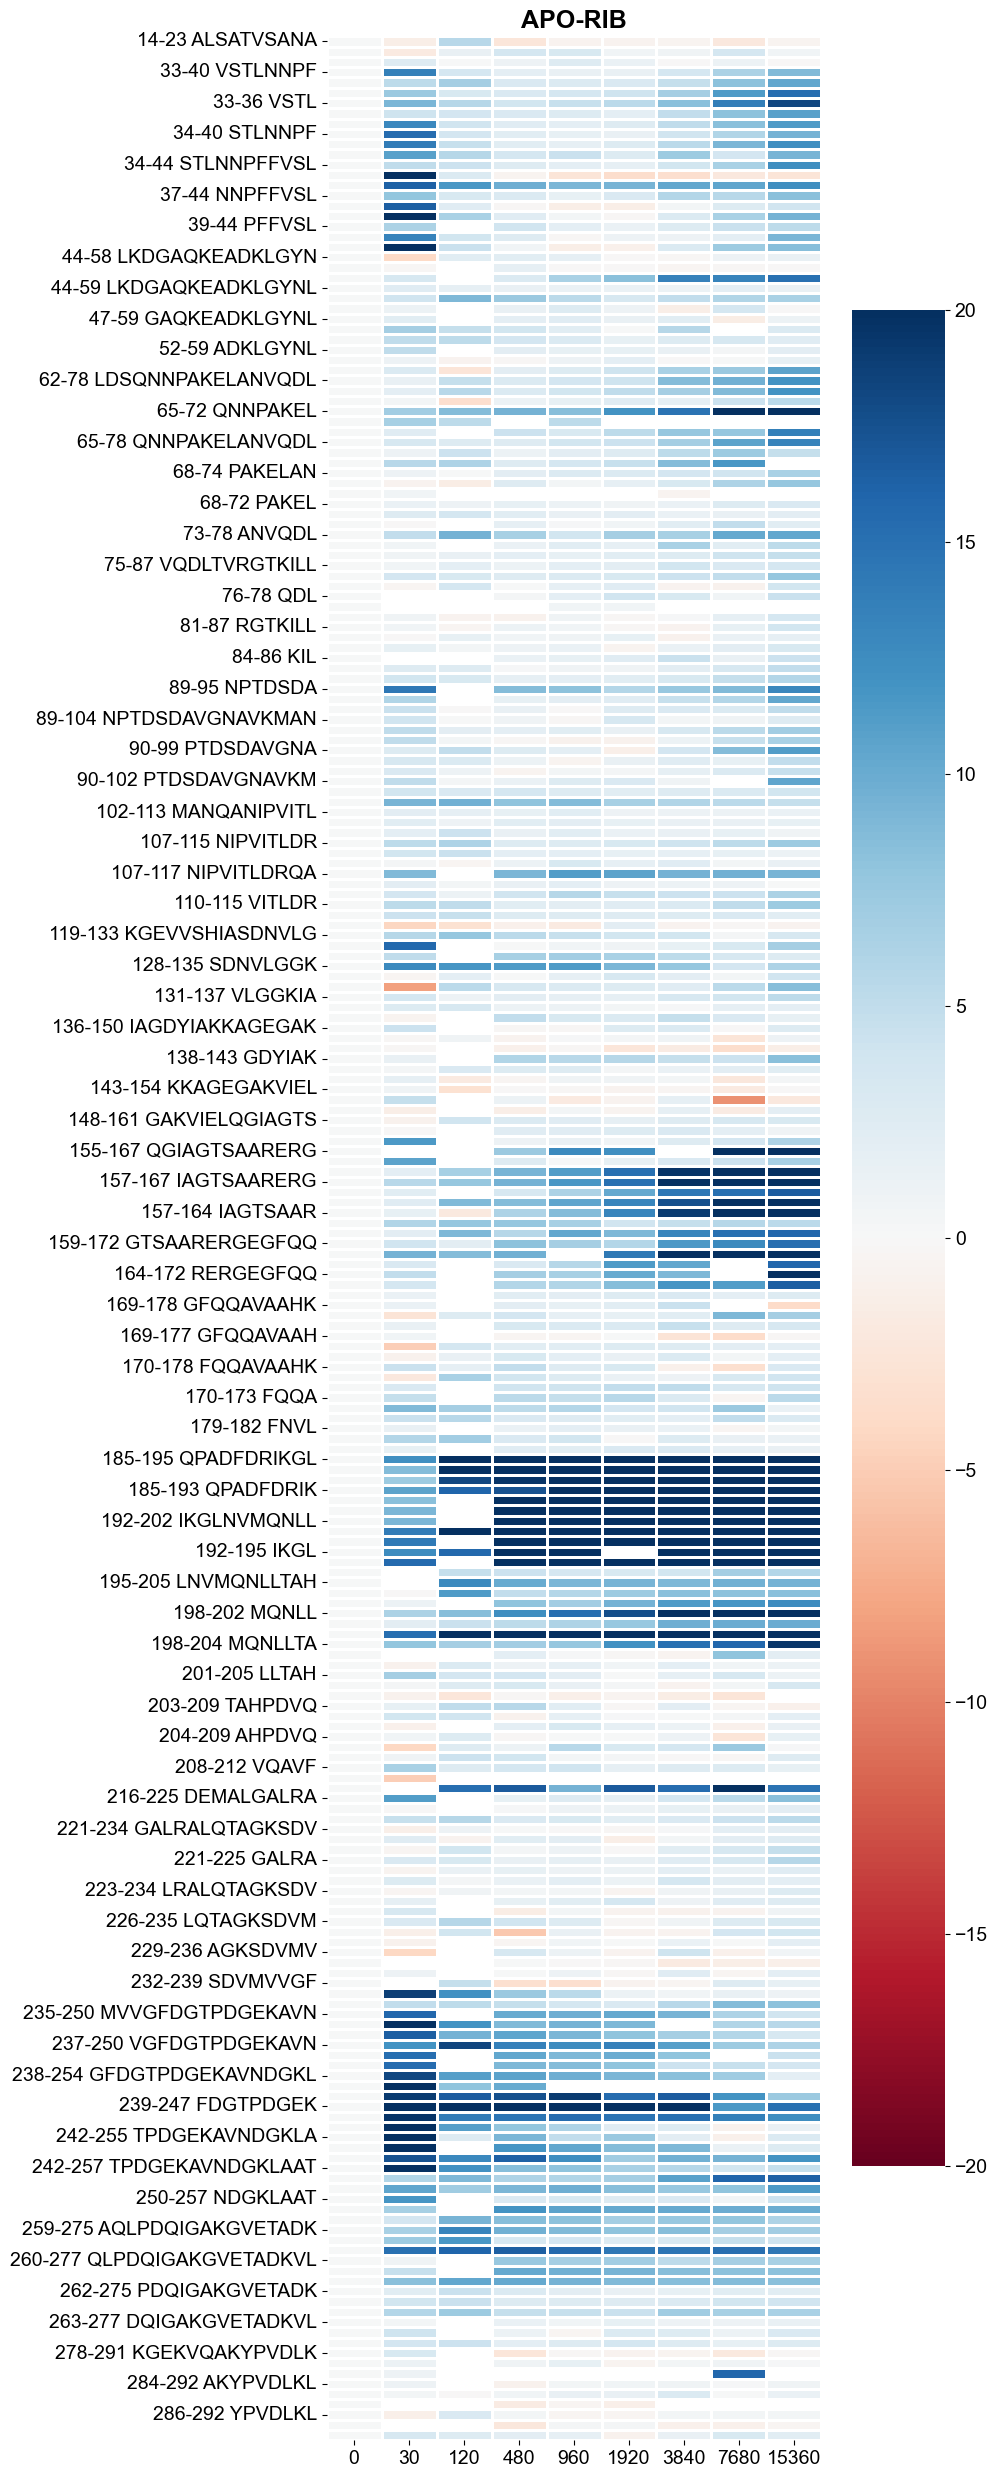

In [18]:
#  it can be visualized as a heatmap
create_heatmap_compare_tp(pep_compres, 20)

In [19]:
# make all the plots and save them

from itertools import product

items =[state.state_name for state in hdxms_data.states]
combinations = product(['APO'], [x for x in items if x != 'APO'])


OUTDIR = output_path
if not os.path.exists(OUTDIR):
    os.makedirs(OUTDIR)

for state1_name, state2_name in combinations:

    state1_list = [i.get_state(state1_name) for i in hdxms_data_list]
    state2_list = [i.get_state(state2_name) for i in hdxms_data_list]

    compare = HDXStatePeptideCompares(state1_list, state2_list)
    compare.add_all_compare()

    heatmap_compare_tp = create_heatmap_compare_tp(compare, 20)
    heatmap_compare_tp.savefig(f'{OUTDIR}/{state1}-{state2}-heatmap-tp.png')

    heatmap_compare = create_heatmap_compare(compare, 20)
    heatmap_compare.savefig(f'{OUTDIR}/{state1}-{state2}-heatmap.png')

    create_compare_pymol_plot(compare, colorbar_max=20, pdb_file=pdb_file, path=OUTDIR)



    res_compares = HDXStateResidueCompares([i for i in range(1, 320)], state1_list, state2_list)
    res_compares.add_all_compare()

    create_compare_pymol_plot(res_compares, 20, pdb_file=pdb_file, path=OUTDIR)

## calculate the PFs

In [ ]:
# save the data object for later use

out_path = f'./output//bayesian_hdx'

if not os.path.exists(out_path):
    os.makedirs(out_path)
    
    

import pickle

with open(f'{out_path}/hdxms_data_list.pkl', 'wb') as f:
    pickle.dump(hdxms_data_list, f)

In [ ]:
# export the data to the format required by the Bayesian HDX software

exp_names = ['10-25', '10-18']

for i in range(2):
    #exp_name = raw_spectra_paths[i].split('/')[-2].split('SpecExport_')[-1]
    exp_name = exp_names[i]
    export_iso_files(hdxms_data_list[i], outdir=f'{out_path}/spectra_{exp_name}', overwrite=True)
    df = revert_hdxmsdata_to_dataframe(hdxms_data_list[i])
    convert_dataframe_to_bayesianhdx_format(df, protein_name=exp_name, OUTPATH=f'{out_path}')
    
    print(exp_name)

In [ ]:
# write ready to run script for each state 

# where the bayesian hdx is installed
# if you are using the docker image, the path is '/app/bayesian_hdx/v2/pyext/src'

#bayesian_hdx_install_dir = '/home/chenlin/Documents/research_git/bayesian_hdx/v2/pyext/src'
bayesian_hdx_install_dir = '/app/bayesian_hdx/v2/pyext/src'
out_path=os.path.abspath(f'{out_path}')

state_names = list(set([state.state_name for data in hdxms_data_list for state in data.states]))
for protein_state in state_names:
    script = tools.generate_bayesian_hdx_script(bayesian_hdx_install_dir,
                                          exp_names, protein_sequence, protein_state, out_path,
                                          making_chunks=True)
    # # write the script to a file
    # with open(f'{out_path}/run_bayesian_hdx_{protein_state}.py', 'w') as f:
    #     f.write(script)
    with open(f'{out_path}/run_bayesian_hdx_{protein_state}_chunks.py', 'w') as f:
        f.write(script)


# run the script in the terminal
# python run_bayesian_hdx_APO.py

# or run the script in the jupyter notebook

# %run run_bayesian_hdx_APO.py



In [22]:
# export the logP values into the b-factors of the pdb file

import MDAnalysis

u = MDAnalysis.Universe(pdb_file)
u.atoms.tempfactors = 0

def get_index_offset(ana_obj, pdb_file,):
    
    from pigeon_feather.tools import pdb2seq, find_peptide
    
    pdb_sequence = pdb2seq(pdb_file)
    a_middle_pep = ana_obj.results_obj.protein_sequence[80:90]
    pdb_start, pdb_end= find_peptide(pdb_sequence, a_middle_pep)
    index_offset = 80 - pdb_start
    return index_offset

index_offset = get_index_offset(ana_apo, pdb_file)

diff_list = []
for res_i,_ in enumerate(ana_apo.results_obj.protein_sequence):
    apo_res = ana_apo.results_obj.get_residue_by_resindex(res_i)
    lig_res = ana_lig.results_obj.get_residue_by_resindex(res_i)
    
    if apo_res.is_nan() or apo_res.resname == 'P':
        continue
    
    #diff =  np.average(apo_res.mini_pep.clustering_results) - np.average(tri_res.mini_pep.clustering_results)
    
    avg_apo_logP = np.average(apo_res.clustering_results_logP)
    std_apo_logP = np.average(apo_res.std_within_clusters_logP)
    
    avg_tri_logP = np.average(lig_res.clustering_results_logP)
    std_tri_logP = np.average(lig_res.std_within_clusters_logP)
    
    # if not siginificant difference
    if abs(avg_apo_logP - avg_tri_logP) < std_apo_logP + std_tri_logP:
        continue
    else:
        diff = avg_apo_logP - avg_tri_logP
    

    protein_res = u.select_atoms(f"protein and resid {apo_res.resid - index_offset}")
    protein_res.atoms.tempfactors = diff
    #protein_res.atoms.tempfactors = avg_tri_logP
    

    
u.atoms.write(f"{out_path}/2dri_logP_APO-RIB_{out_path.split('_')[-1]}.pdb")

NameError: name 'ana_apo' is not defined